Data:

Contains information of patients who either had stoke or not.

The aim of the analysis is to develop a model that is able to predict patients who will get stroke

The Data set contains 10 features describing the patient historical information and any underlying conditions.

Using this data will attempt to answer the below questions:

1. Does smoking increase/decrease the probability of getting stroke?
2. Does a patient with other underlying conditions more susceptible to stroke?
3. What are the top three predictors of stroke?

In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#import the data and view
df = pd.read_csv('/Users/dgitahi/Documents/nano degree/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [70]:
df.shape

(5110, 12)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Checking for Missing values.

In [72]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [73]:
print(f'percentage missing', df['bmi'].isnull().sum()/df.shape[0]*100)

percentage missing 3.9334637964774952


Only BMI has 4% missing data. Since BMI is calculated from the patient weight and height. Missing would mean either of the two was missing or both but not zero. We can therefore use mean average to replace the missing

In [74]:
###replace the missing values with the mean.

df['bmi'].fillna(value = df['bmi'].mean(),inplace=True)

### Exploratoly Data Analysis

- Bar plot for the numerical variabes
- count plot for the catgerical variables
- feature exp for checking the probability.

In [181]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,both_heart_hypertension,age_bmi,age_avg_glucose,glucose_bmi
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728,0.012524,1.502240,0.451352,3.855755
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320,0.111221,0.832270,0.281029,1.707524
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.004734,0.000573,0.618478
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000,0.000000,0.863809,0.245562,2.630938
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000,0.000000,1.442623,0.403809,3.431136
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000,0.000000,2.050511,0.630517,4.645798
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,6.991150,1.444934,16.054930


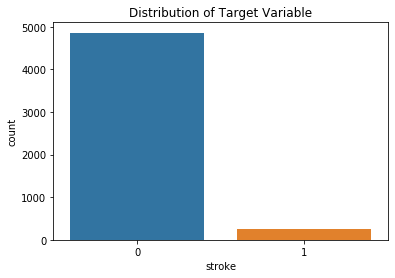

In [75]:
plt.title('Distribution of Target Variable')
sns.countplot(x= 'stroke',data=df)
plt.show()

The data is highly imbalanced.

#### Numerical Variables analysis

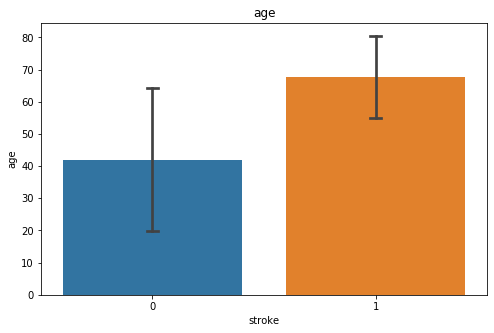

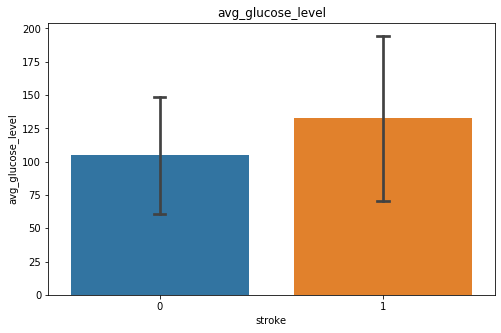

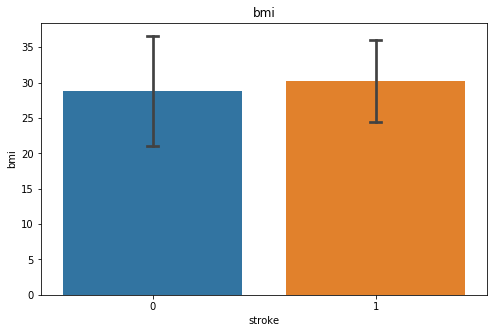

In [76]:
for i in ['age','avg_glucose_level','bmi']:
    plt.figure(figsize=(8,5))
    plt.title(i)
    sns.barplot(x= "stroke",y= i,data = df,capsize=0.05,ci='sd')
    plt.show()

Older patients seem to be more suseptible to stroke

Patients with stroke have a higher glucose level.

Average BMI for both group of patient is similar.




### Comparison of Patients with other diseases and those without, on their chance of getting a stroke

#### Heart Disease patients

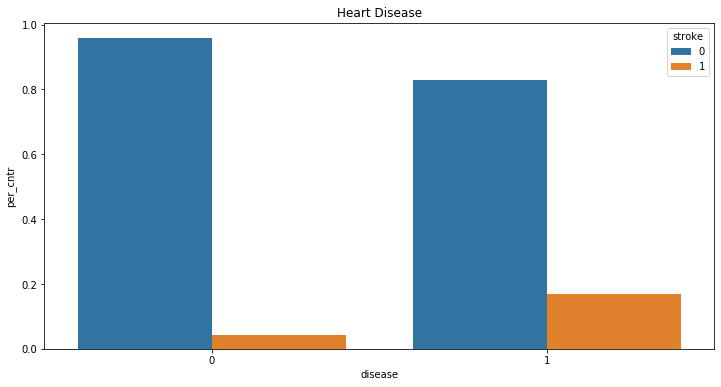

In [77]:
df_heartdisease =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.heart_disease==1].groupby('stroke')['id'].count()[1]/df[df.heart_disease==1].shape[0],
                              df[df.heart_disease==0].groupby('stroke')['id'].count()[1]/df[df.heart_disease==0].shape[0],
                              df[df.heart_disease==1].groupby('stroke')['id'].count()[0]/df[df.heart_disease==1].shape[0],
                              df[df.heart_disease==0].groupby('stroke')['id'].count()[0]/df[df.heart_disease==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Heart Disease')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_heartdisease)

plt.show()

The percentage of patients with stroke is relatively higher in the group of patients with heart disease(17%) compared to those without hear disease(3%)

#### Hypertension

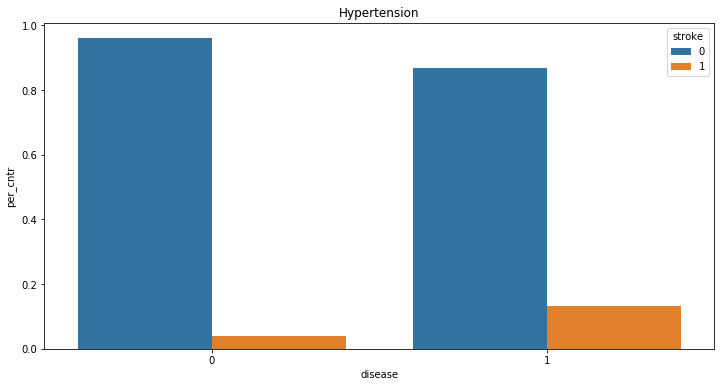

In [78]:
df_hypertension =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.hypertension==1].groupby('stroke')['id'].count()[1]/df[df.hypertension==1].shape[0],
                              df[df.hypertension==0].groupby('stroke')['id'].count()[1]/df[df.hypertension==0].shape[0],
                              df[df.hypertension==1].groupby('stroke')['id'].count()[0]/df[df.hypertension==1].shape[0],
                              df[df.hypertension==0].groupby('stroke')['id'].count()[0]/df[df.hypertension==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Hypertension')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_hypertension)

plt.show()

The percentage of patients with stroke is relatively higher in the group of patients with hypertension(13.2%) compared to those without hypertension(3%)

We can therefore conclude that the patient with ohter diseaseses e.g hypertension and heardisease are more susceptible to getting stroke.

 A patient with either hypertension or heart disease has a higher chance of having stroke than a patient without the disese

#### Both Heart Disease and Hypertension 

In [79]:
both_heart_hypertension = []
for i in range(0,len(df)):
    if df.hypertension.iloc[i] ==1 & df.heart_disease.iloc[i] ==1:
        both_heart_hypertension.append(1)
    else:
        both_heart_hypertension.append(0)
        
df['both_heart_hypertension'] = both_heart_hypertension

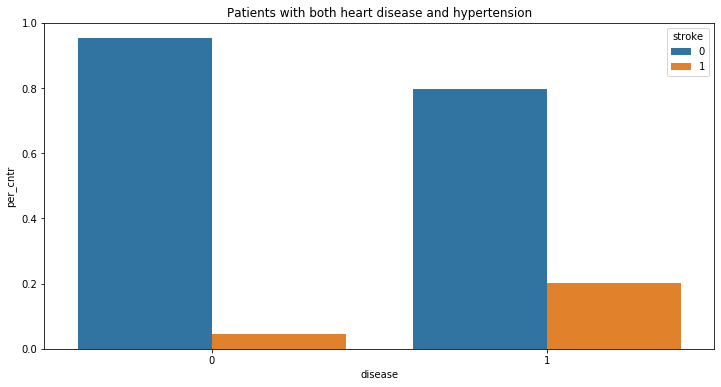

In [143]:
df_heart_hypertension =pd.DataFrame({'stroke':[1,1,0,0],'disease':[1,0,1,0],
                  'per_cntr':[df[df.both_heart_hypertension==1].groupby('stroke')['id'].count()[1]/df[df.both_heart_hypertension==1].shape[0],
                              df[df.both_heart_hypertension==0].groupby('stroke')['id'].count()[1]/df[df.both_heart_hypertension==0].shape[0],
                              df[df.both_heart_hypertension==1].groupby('stroke')['id'].count()[0]/df[df.both_heart_hypertension==1].shape[0],
                              df[df.both_heart_hypertension==0].groupby('stroke')['id'].count()[0]/df[df.both_heart_hypertension==0].shape[0]]})


plt.figure(figsize=(12,6))
plt.title('Patients with both heart disease and hypertension')
sns.barplot(x='disease',y='per_cntr',hue ='stroke',data=df_heart_hypertension)

plt.show()

The chance increases further,for the patients with both hypertension and heart disease, 20% have got stroke while for those with either the condition or none at all 4% have stroke

We could therefore conclude that having either the heartdisease or hypertension increases your chance of getting stroke.For those with both condition their chance of getting stroke is even higher

### Does smoking increase the chances of getting stroke

In [81]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [82]:
df.groupby(by = 'smoking_status')['id'].count()

smoking_status
Unknown            1544
formerly smoked     885
never smoked       1892
smokes              789
Name: id, dtype: int64

#### Drop those with unknown

For the pourpose of this analysis we drop any patient who smoking status is unknown

In [83]:

index_names = df[df['smoking_status']=='Unknown'].index
df_smokers = df.drop(index_names)

In [89]:
df.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [126]:
stroke_per = 5

In [127]:
print("Only {0:.2f}% of the {1} produced worldwide is {2}!".format(stroke_per, status, "analyzed"))

Only 5.00% of the formerly smoked produced worldwide is analyzed!


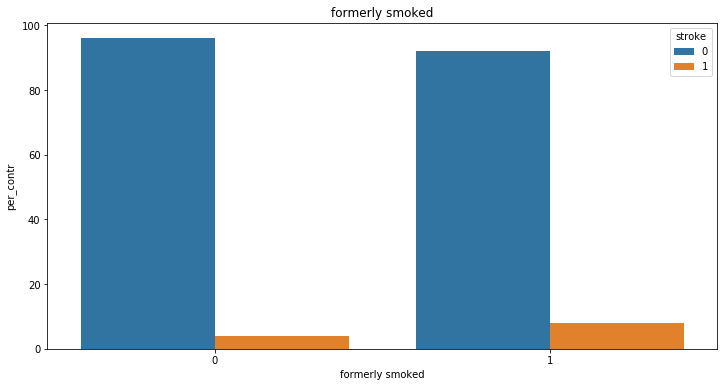

Patients who smoking status is formerly smoked,8.00% had stroke compared to 4.00% from the rest


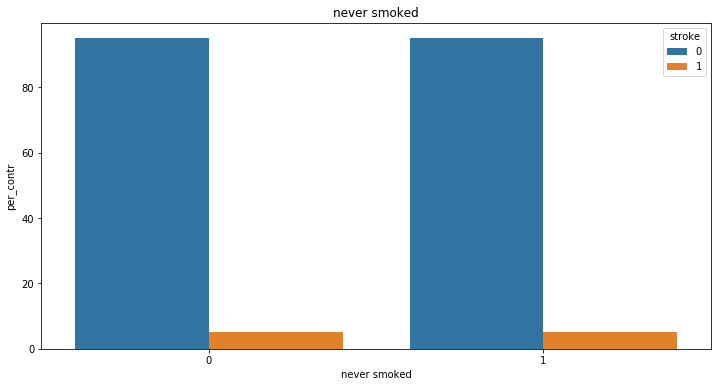

Patients who smoking status is never smoked,5.00% had stroke compared to 5.00% from the rest


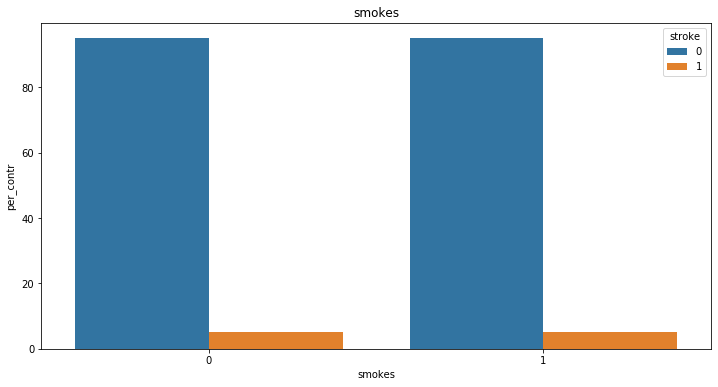

Patients who smoking status is smokes,5.00% had stroke compared to 5.00% from the rest


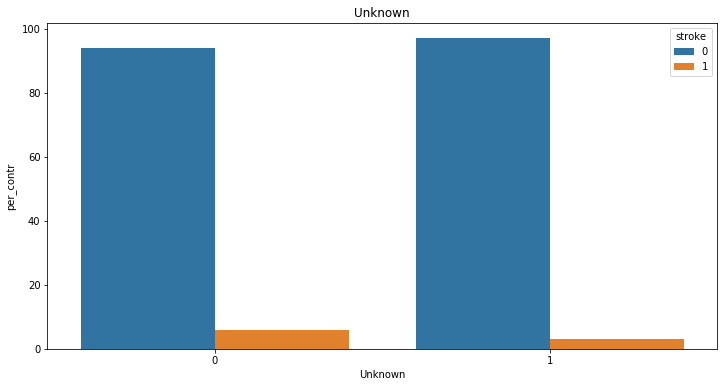

Patients who smoking status is Unknown,3.00% had stroke compared to 6.00% from the rest


In [142]:
#Comparing patients smoking status aand the percentage of the patient who have stroke
smoking_status =df.smoking_status.unique()




def smoking_effect(status):
    df_ = df[df['smoking_status']==status]
    summ = df_.groupby(by = 'stroke')['id'].count()
    stroke_per= round(summ[1]/len(df_)*100) # patients who have stroke and have the spesified status
    no_stroke_per = 100-stroke_per# patients who do not have stroke and have the spesified status



    df_ = df[~(df['smoking_status']==status)]
    #df_ = df[(df['smoking_status']=="never smoked")]
    summ = df_.groupby(by = 'stroke')['id'].count()
    _stroke_per = round(summ[1]/len(df_)*100) # patients who have stroke and dont have the specified status
    _no_stroke_per = 100-_stroke_per# patients who do not have stroke and dont have the specified status

    df_smoke = pd.DataFrame({'stroke':[1,1,0,0],status:[1,0,1,0],'per_contr':
                             [stroke_per,_stroke_per,no_stroke_per,_no_stroke_per]})
    
    
   

    #print(stroke_per)

    plt.figure(figsize=(12,6))
    plt.title(status)
    sns.barplot(x=status,y='per_contr',hue ='stroke',data=df_smoke)

    plt.show()
    
    print("Patients who smoking status is {1},{0:.2f}% had stroke compared to {2:.2f}% from the rest".format(stroke_per,status,_stroke_per))
    #print("Patients who did not  {1},{0:.2f}% had stroke".format(_stroke_per,status))
    
    #print(stroke_per)    
for status in smoking_status:
    smoking_effect(status)
#print("Only {0:.2f}% of the {1} produced worldwide is {2}!".format(0.5155675, "data", "analyzed"))
    
    
#Patients who smoking status is formerly smoked,8.00% had stroke compared to 4% from the rest of the patients

From the data above, we observe that patients who formerly smoked 8% had stroke compared to 5% who had never smoked.


Those who are currently smoking, the percentage of those with disease is similar to those who have never smoked

This may sugggest that smoking has a cause effect on stroke, though it may be after a long time

### Categorical Variables

Convert the categgorical variables into dummies and drop the original column. Keep k-1 columns.




In [145]:
def create_dummies(df):
    """create dummy columns for the categorical 
        feature. 
        returns a df that has all the numeric features and the dummy features"""
    df_cat_features = df.select_dtypes(include = ['object'])
    df_numeric_feature = df.select_dtypes(include=['float64','int64'])
    cat_feature_list = df_cat_features.columns.values
    df_cat_dummies = pd.get_dummies(df_cat_features,prefix=cat_feature_list,prefix_sep='_',columns=cat_feature_list,drop_first=True)
    df_new = df_numeric_feature.join(df_cat_dummies)
    #print(df_new)
    return df_new
df_new = create_dummies(df)

### Train and Test Model

In [159]:

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report,accuracy_score

In [160]:
X= df_new.drop(columns=['stroke','id'],axis= 1)
y= df_new['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


#### Train and Test several Models and Pick the Best

In [161]:
models = {'RF': RandomForestClassifier(),'LR': LogisticRegression(), 'KN':KNeighborsClassifier(),
         'AD':AdaBoostClassifier()}

In [162]:

for i in models.keys():
    model = models[i]
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})
    conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
    cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)
    accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)
  
    print(f" model: {i} ")
    
    print(conf_opt)
    print(cross_tab)
    print(f" model accuracy ={accuracy} ")

 model: RF 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.14      0.01      0.02        89

   micro avg       0.94      0.94      0.94      1533
   macro avg       0.54      0.50      0.49      1533
weighted avg       0.90      0.94      0.91      1533

predictions     0  1   All
y_true                    
0            1438  6  1444
1              88  1    89
All          1526  7  1533
 model accuracy =0.9386823222439661 
 model: LR 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

   micro avg       0.94      0.94      0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

predictions     0   All
y_true                 
0            1444  1444
1              89    89
All          1533  1533
 model accuracy =0.94194390084

None of the model is performing well, we probably need to deal with the issue of the imbalanced data

### Treating the imbalance in the dataset
We try out several methods and find out which works the best:
* Oversampling
* Undersampling
* SMOTE

#### OverSampling

In [163]:


from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0: 3417, 1: 160})
Resampled dataset shape Counter({0: 3417, 1: 3417})


In [164]:
models = {'RF': RandomForestClassifier(),'LR': LogisticRegression(), 'KN':KNeighborsClassifier(),
         'AD':AdaBoostClassifier()}
for i in models.keys():
    model = models[i]
    model.fit(X_res,y_res)
    pred = model.predict(X_test)
    df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})
    conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
    cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)
    accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)
  
    print(f" model: {i} ")
    
    print(conf_opt)
    print(cross_tab)
    print(f" model accuracy ={accuracy} ")

 model: RF 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.31      0.04      0.08        89

   micro avg       0.94      0.94      0.94      1533
   macro avg       0.63      0.52      0.52      1533
weighted avg       0.91      0.94      0.92      1533

predictions     0   1   All
y_true                     
0            1435   9  1444
1              85   4    89
All          1520  13  1533
 model accuracy =0.9386823222439661 
 model: LR 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

   micro avg       0.75      0.75      0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.82      1533

predictions     0    1   All
y_true                      
0            1086  358  1444
1              24   65    89
All          1110  423  1533


#### SMOTE

In [165]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 3417, 1: 160})
Resample dataset shape Counter({0: 3417, 1: 3417})


In [166]:
models = {'RF': RandomForestClassifier(),'LR': LogisticRegression(), 'KN':KNeighborsClassifier(),
         'AD':AdaBoostClassifier()}
for i in models.keys():
    model = models[i]
    model.fit(X_smote,y_smote)
    pred = model.predict(X_test)
    df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})
    conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
    cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)
    accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)
  
    print(f" model: {i} ")
    
    print(conf_opt)
    print(cross_tab)
    print(f" model accuracy ={accuracy} ")

 model: RF 
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.21      0.03      0.06        89

   micro avg       0.94      0.94      0.94      1533
   macro avg       0.58      0.51      0.51      1533
weighted avg       0.90      0.94      0.91      1533

predictions     0   1   All
y_true                     
0            1433  11  1444
1              86   3    89
All          1519  14  1533
 model accuracy =0.9367253750815394 
 model: LR 
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1444
           1       0.15      0.73      0.25        89

   micro avg       0.75      0.75      0.75      1533
   macro avg       0.57      0.74      0.55      1533
weighted avg       0.93      0.75      0.82      1533

predictions     0    1   All
y_true                      
0            1085  359  1444
1              24   65    89
All          1109  424  1533


Oversampling seem to perform better especially for the ADABoost Model. 

Will Use oversampling Technique to treat for the inbalance in the Data.


To increase the model performance we need to do feature enggeneering.

#### Feature Engeneering

In [167]:
df_new.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,both_heart_hypertension,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,0,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,0,1,0,0,0,1,0


In [168]:
### combine heart and hypertension

both_heart_hypertension = []
for i in range(0,len(df)):
    if df.hypertension.iloc[i] ==1 & df.heart_disease.iloc[i] ==1:
        both_heart_hypertension.append(1)
    else:
        both_heart_hypertension.append(0)
        
df['both_heart_hypertension'] = both_heart_hypertension

In [169]:
#combine smoking and ever smoked

smoking = []
for i in range(0,len(df)):
    if df['smoking_status'].iloc[i] == 'formerly smoked':
        smoking.append('1')
    elif df['smoking_status'].iloc[i] == 'smokes':
        smoking.append('1')
        
    elif df['smoking_status'].iloc[i] == 'Unknown':
        smoking.append('')
    else:
        smoking.append('0')

df['ever_smoked'] = smoking

    

In [170]:
### calculate Ratios
#Age to BMI
df['age_bmi'] = df['age']/df['bmi']
df['age_avg_glucose'] = df['age']/df['avg_glucose_level']
df['glucose_bmi'] = df['avg_glucose_level']/df['bmi']


#### Test the Model with the New Features

In [171]:
def create_dummies(df):
    """create dummy columns for the categorical 
        feature. 
        returns a df that has all the numeric features and the dummy features"""
    df_cat_features = df.select_dtypes(include = ['object'])
    df_numeric_feature = df.select_dtypes(include=['float64','int64'])
    cat_feature_list = df_cat_features.columns.values
    df_cat_dummies = pd.get_dummies(df_cat_features,prefix=cat_feature_list,prefix_sep='_',columns=cat_feature_list,drop_first=True)
    df_new = df_numeric_feature.join(df_cat_dummies)
    #print(df_new)
    return df_new
df_new = create_dummies(df)

In [172]:
# ratio: age and BMI = age_bmi
# ratio age and avg_glucose = age_avg_glucose
# combine smoking = ever_smoked
# combine diseases= all_dis_present



In [173]:
X= df_new.drop(columns=['stroke','id'],axis= 1)
y= df_new['stroke']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)


models = {'RF': RandomForestClassifier(),'LR': LogisticRegression(), 'KN':KNeighborsClassifier(),
         'AD':AdaBoostClassifier()}


from collections import Counter
from imblearn.over_sampling import RandomOverSampler

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_res))




model = AdaBoostClassifier()
model.fit(X_res,y_res)
pred = model.predict(X_test)
df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})

conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)

accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)


models = {'RF': RandomForestClassifier(),'LR': LogisticRegression(), 'KN':KNeighborsClassifier(),
         'AD':AdaBoostClassifier()}
for i in models.keys():
    model = models[i]
    model.fit(X_res,y_res)
    pred = model.predict(X_test)
    df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})
    conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
    cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)
    accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)
  
    print(f" model: {i}  ") 
    
    print(conf_opt)

    print(cross_tab)  

    print(f" model accuracy ={accuracy} ")


Original dataset shape Counter({0: 3417, 1: 160})
Resampled dataset shape Counter({0: 3417, 1: 3417})
 model: RF  
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.09      0.01      0.02        89

   micro avg       0.94      0.94      0.94      1533
   macro avg       0.52      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

predictions     0   1   All
y_true                     
0            1434  10  1444
1              88   1    89
All          1522  11  1533
 model accuracy =0.9360730593607306 
 model: LR  
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1444
           1       0.15      0.70      0.25        89

   micro avg       0.75      0.75      0.75      1533
   macro avg       0.56      0.73      0.55      1533
weighted avg       0.93      0.75      0.82      1533

predictions     0    1   All
y_true      

After dealing with the inbalance problem and adding more features we have the Adaboost model perform better tthan the rest.

We will continue with the ADABOOST model and optimize the model.


### Hyperparameter Tuning

In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import GridSearchCV

#### Grind Search

In [394]:
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
model = AdaBoostClassifier()
# define the grid of values to search
grid = dict()
grid['n_estimators'] = [50, 100,200,500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]
# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='f1')
# execute the grid search
grid_result = grid_search.fit(X_res, y_res)
# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.893384 using {'learning_rate': 1.0, 'n_estimators': 500}
0.796781 (0.010131) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.796781 (0.010131) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.796781 (0.010131) with: {'learning_rate': 0.0001, 'n_estimators': 200}
0.796781 (0.010131) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.796781 (0.010131) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.796781 (0.010131) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.796781 (0.010131) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.796781 (0.010131) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.796781 (0.010131) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.796781 (0.010131) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.795721 (0.010795) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.801791 (0.011592) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.803196 (0.011100) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.808

#### Best Model

In [175]:
ros = RandomOverSampler(random_state=42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 15)

X_res, y_res = ros.fit_resample(X_train, y_train)


model = AdaBoostClassifier(n_estimators=500, algorithm='SAMME')
model.fit(X_res,y_res)
pred = model.predict(X_test)
df_pred = pd.DataFrame({'predictions':pred,'y_true':y_test})

conf_opt = classification_report(df_pred.y_true,df_pred.predictions)
cross_tab = pd.crosstab(df_pred.y_true,df_pred.predictions,margins=True)

accuracy = accuracy_score(df_pred.y_true,df_pred.predictions)

In [176]:
print(conf_opt)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      1457
           1       0.12      0.74      0.21        76

   micro avg       0.73      0.73      0.73      1533
   macro avg       0.55      0.73      0.52      1533
weighted avg       0.94      0.73      0.80      1533



The best model so Far has recall: 74% and Precision: 12%


Based on the preferences,we can either optimize for the Precision or Recall.

If stroke treatment has no harm on the patient then we probally would want to optimize on the recall, so that we can ensure that we identify as many patients as possible who are likely to get stroke.


Further optimization can be done by the use of the cutoff and also feature engeneering based on the understanding of the existing features

#### Importance Features

In [177]:
feature_importance = pd.DataFrame({'Features': X_train.columns,'Importance':model.feature_importances_})

feature_importance.sort_values(by = 'Importance',ascending = False,inplace = True)
feature_importance.head(10)

,Features,Importance
3,avg_glucose_level,0.280040
7,age_avg_glucose,0.264855
0,age,0.178944
8,glucose_bmi,0.115722
6,age_bmi,0.075367
4,bmi,0.064535
2,heart_disease,0.008500
9,gender_Male,0.005639
16,Residence_type_Urban,0.004952
15,work_type_children,0.001447


In [180]:
import plotly.express as px

fig = px.bar(feature_importance.head(5), x='Features', y='Importance',title='Feature Importance')
fig.show()

Glucose Level, age and BMI are the the top 3 important feature predictor of Stroke